In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
df  = pd.read_csv(r"C:\Users\RupesH\Desktop\AIRLINEPASSENGER\airline_passenger_satisfaction.csv")

In [3]:
df.shape

(129880, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer_Type                           129880 non-null  object 
 4   Type_of_Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight_Distance                         129880 non-null  int64  
 7   Departure_Delay                         129880 non-null  int64  
 8   Arrival_Delay                           129487 non-null  float64
 9   Departure_and_Arrival_Time_Convenience  129880 non-null  int64  
 10  Ease_of_Online_Booking                  1298

In [5]:
df.head()

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
df.tail()

,ID,Gender,Age,Customer_Type,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [7]:
df.isnull().sum()[df.isnull().sum()>0]

Arrival_Delay    393
dtype: int64

In [8]:
df = df.dropna(axis= 0)

In [9]:
df = df.drop(["ID", "Customer_Type"], axis=1)

<Axes: xlabel='Class', ylabel='Flight_Distance'>

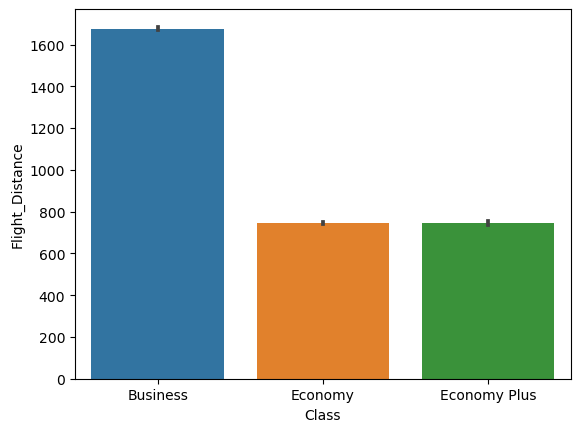

In [10]:
sns.barplot(y=df["Flight_Distance"], x=df["Class"])

In [11]:
pt2 = df.pivot_table(index = ['Gender', 'Class'], columns = 'Satisfaction',values = 'Age', aggfunc='count')

In [12]:
pt2

Satisfaction         Neutral or Dissatisfied  Satisfied
Gender Class                                           
Female Business                         9639      21540
       Economy                         24099       5472
       Economy Plus                     3786       1167
Male   Business                         9301      21510
       Economy                         23116       5430
       Economy Plus                     3284       1143

<Axes: xlabel='Satisfaction', ylabel='Gender-Class'>

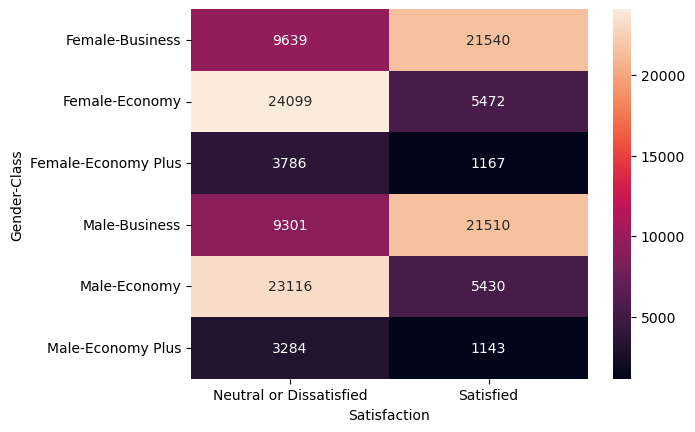

In [13]:
sns.heatmap(pt2, annot=True, fmt= 'g')

In [14]:
tab = pd.crosstab(df.Gender, df.Satisfaction)

In [15]:
tab

Satisfaction,Neutral or Dissatisfied,Satisfied
Gender,,
Female,37524,28179
Male,35701,28083


In [16]:
tab = pd.crosstab(df.Class, df.Satisfaction)

<Axes: xlabel='Satisfaction', ylabel='Class'>

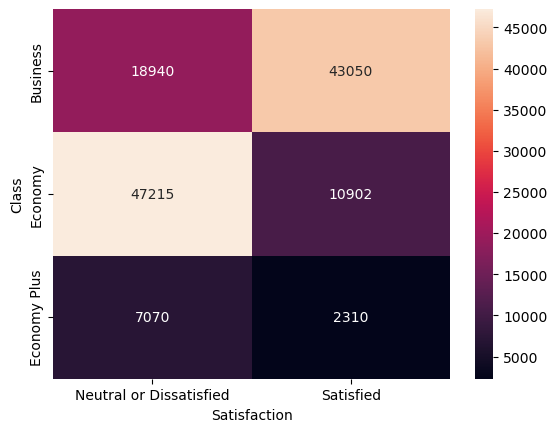

In [17]:
sns.heatmap(tab, annot=True, fmt="g")

<Axes: xlabel='Satisfaction', ylabel='Class'>

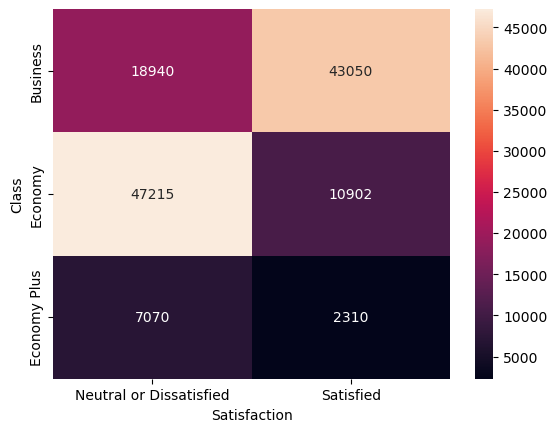

In [18]:
sns.heatmap(tab, fmt="g", annot= True)


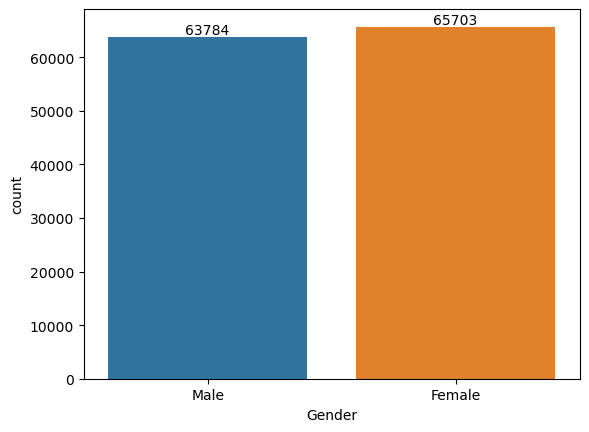

In [19]:
ax= sns.countplot(x= df.Gender)
ax.bar_label(ax.containers[0], fontsize=10);

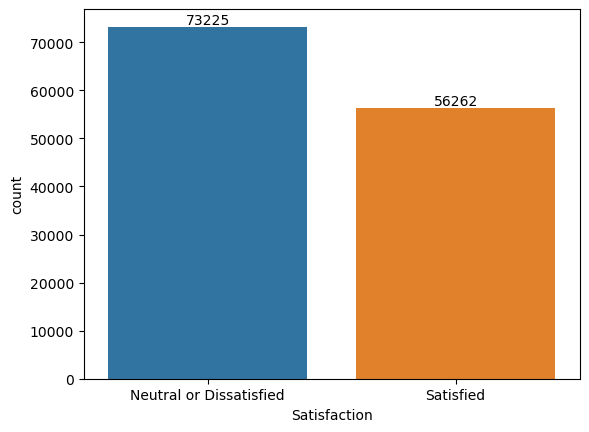

In [20]:
ax1= sns.countplot(x=df.Satisfaction )
ax1.bar_label(ax1.containers[0], fontsize=10);

In [21]:
df.Class.replace({"Economy":0,"Economy Plus":1, "Business":2}, inplace= True)
df["Type_of_Travel"].replace({"Personal":0, "Business":1}, inplace= True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df[df.select_dtypes(include = "object").columns] = df[df.select_dtypes(include = "object").columns].apply(le.fit_transform)

In [24]:
df.describe()

,Gender,Age,Type_of_Travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,Check_in_Service,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.492590,39.428761,0.690764,1.029910,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,...,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886,0.434499
std,0.499947,15.117597,0.462180,0.962638,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,...,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082,0.495693
min,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,0.000000,40.000000,1.000000,1.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,1.000000,51.000000,1.000000,2.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,1.000000,85.000000,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


<Axes: >

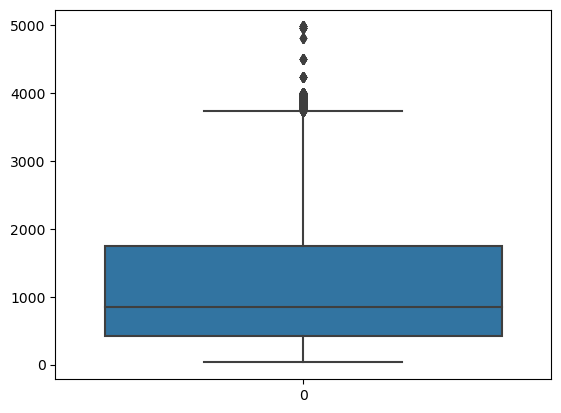

In [25]:
sns.boxplot(df["Flight_Distance"])

<Axes: >

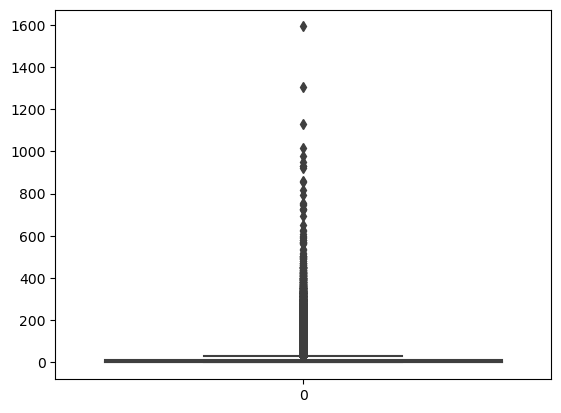

In [26]:
sns.boxplot(df["Departure_Delay"])

<Axes: >

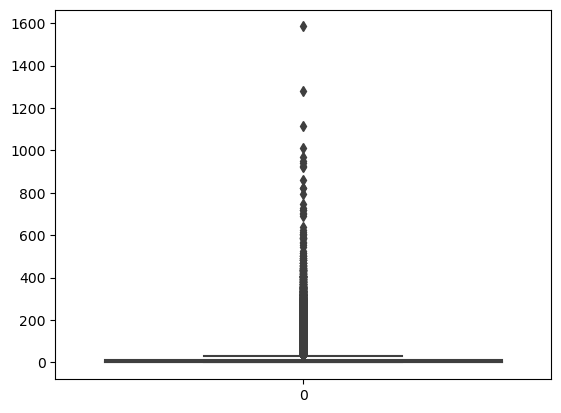

In [27]:
sns.boxplot(df["Arrival_Delay"])

In [28]:
for i in df.columns[:-1]:
  if df[i].dtype==object:
    continue
  else:
    q1=df[i].quantile(q=0.25)
    q3=df[i].quantile(q=0.75)
    iqr=q3-q1

    low=q1-1.5*(iqr)
    high=q3+1.5*(iqr)

    df.loc[(df[i]<low)|(df[i]>high),i]=df[i].median()

<Axes: >

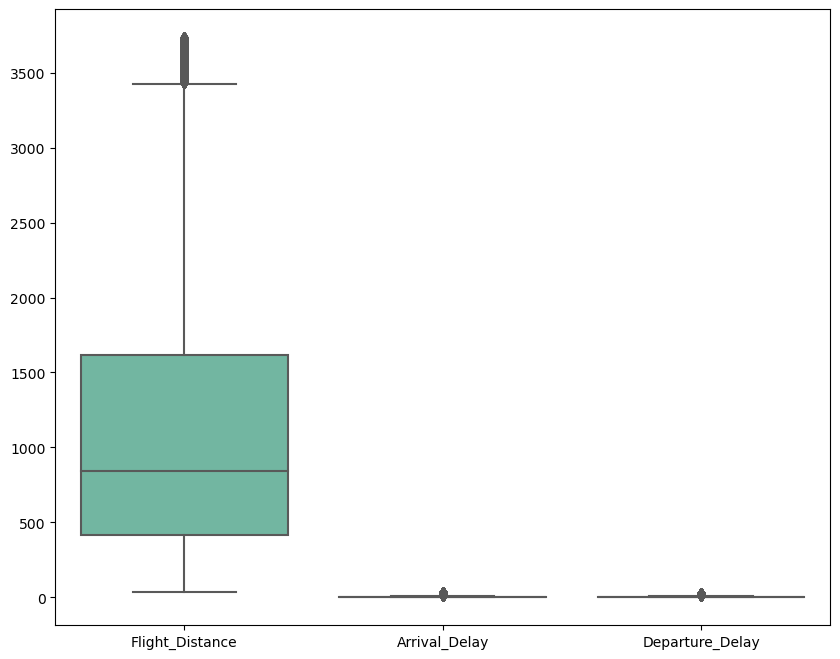

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[["Flight_Distance", "Arrival_Delay", "Departure_Delay"]], color="salmon", palette="Set2")

<Axes: >

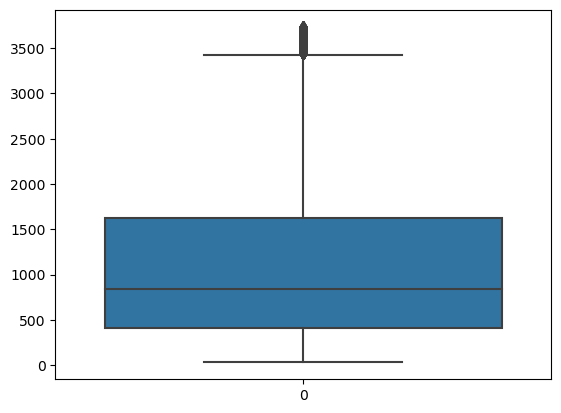

In [30]:
sns.boxplot(df["Flight_Distance"])

<Axes: >

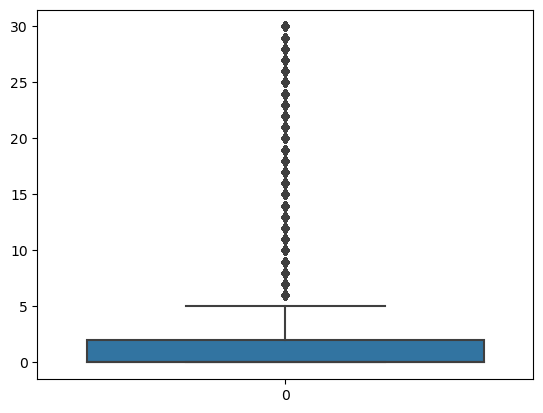

In [31]:
sns.boxplot(df["Departure_Delay"])

<Axes: >

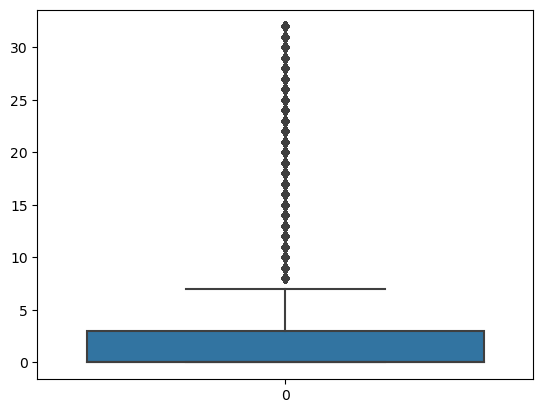

In [32]:
sns.boxplot(df["Arrival_Delay"])

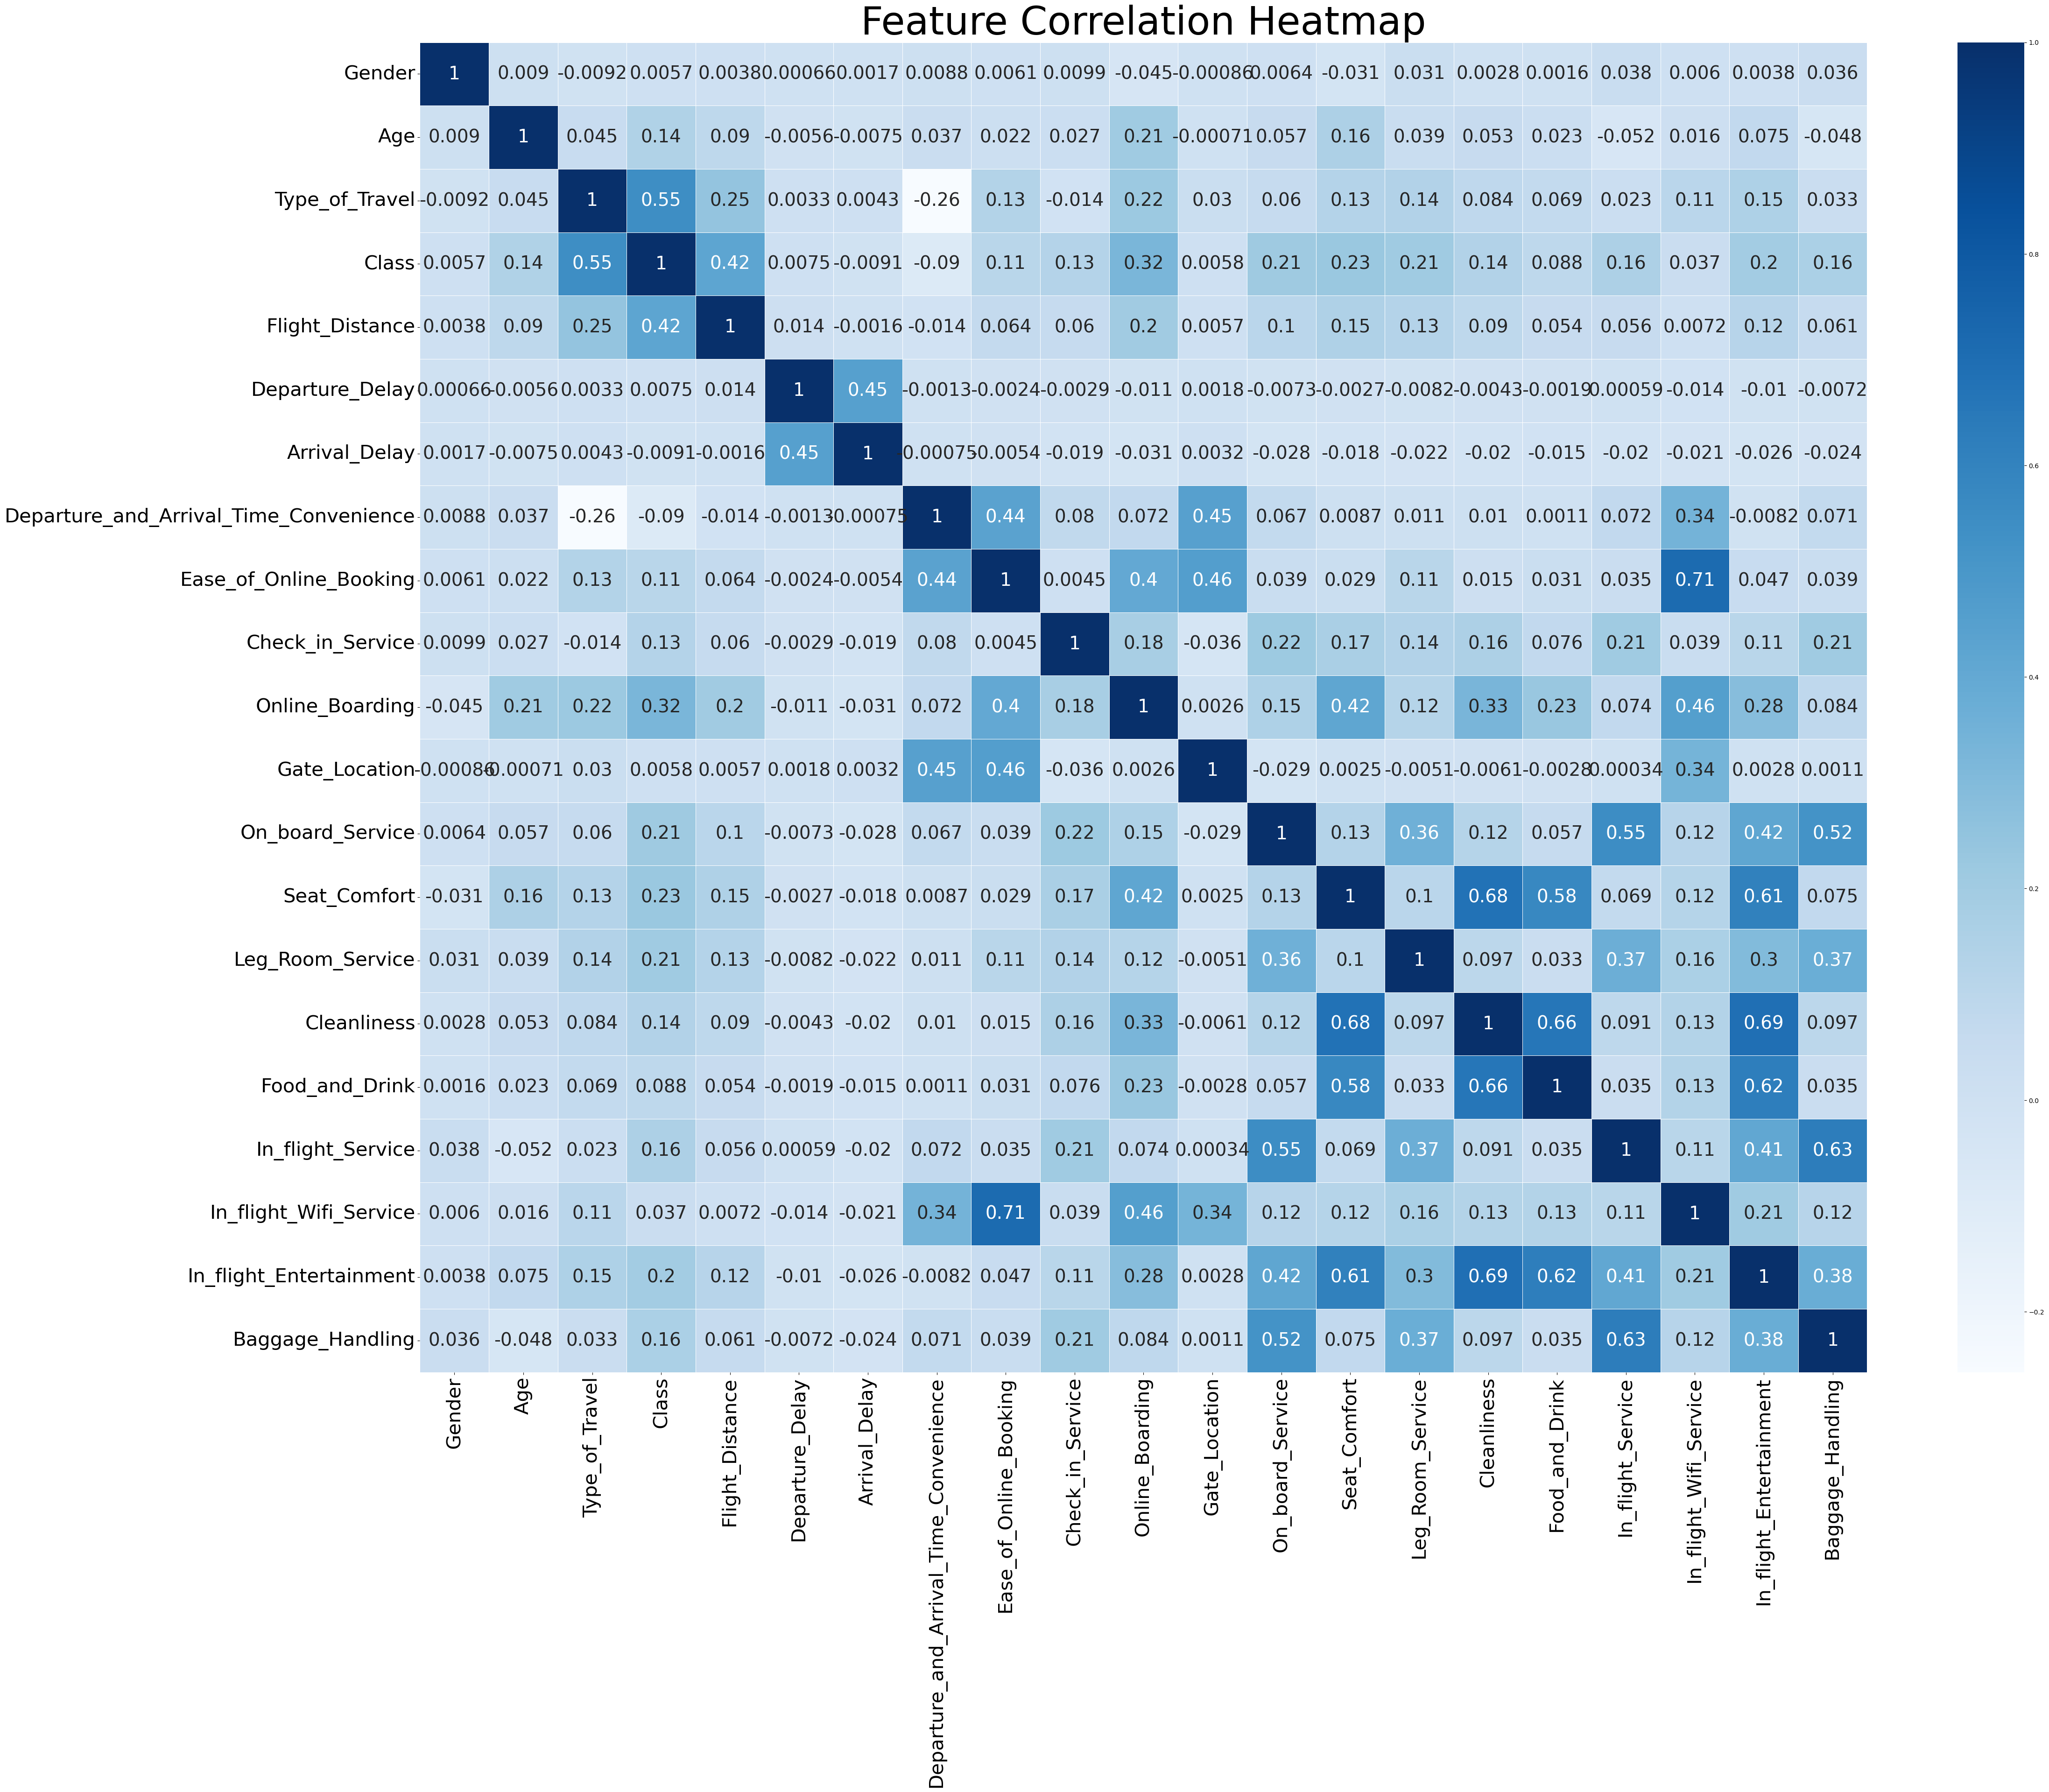

In [33]:
plt.figure(figsize=(50,37))
plt.title("Feature Correlation Heatmap", fontsize = 60)
sns.heatmap(df.drop(["Satisfaction"], axis=1).corr(),annot=True, linewidth=.5, fmt='.2g',annot_kws={'size': 28},cmap="Blues")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

In [34]:
x = df.drop(['Satisfaction'], axis = 1)
y = df.Satisfaction

In [35]:
correlation_values =[]
for i in x.columns:
    correlation_values.append(y.corr(x[i]))

In [36]:
feature_imp = pd.DataFrame()

In [37]:
feature_imp["features"] = x.columns
feature_imp["Imp"] = correlation_values

In [38]:
feature_imp=feature_imp.sort_values("Imp", ascending=False)

In [39]:
feature_imp

,features,Imp
10,Online_Boarding,0.501620
3,Class,0.493066
2,Type_of_Travel,0.449794
19,In_flight_Entertainment,0.398334
13,Seat_Comfort,0.348576
12,On_board_Service,0.322329
14,Leg_Room_Service,0.312557
15,Cleanliness,0.306891
18,In_flight_Wifi_Service,0.283291
4,Flight_Distance,0.277163


In [40]:
significant_list = list(feature_imp[(feature_imp.Imp > 0.2) | (feature_imp.Imp < -0.2)].sort_values(by = "Imp", ascending= False).features)

In [41]:
significant_list

['Online_Boarding',
 'Class',
 'Type_of_Travel',
 'In_flight_Entertainment',
 'Seat_Comfort',
 'On_board_Service',
 'Leg_Room_Service',
 'Cleanliness',
 'In_flight_Wifi_Service',
 'Flight_Distance',
 'Baggage_Handling',
 'In_flight_Service',
 'Check_in_Service',
 'Food_and_Drink']

In [42]:
len(significant_list)

14

In [43]:
significant_list.append('Satisfaction')

In [44]:
significant_list

['Online_Boarding',
 'Class',
 'Type_of_Travel',
 'In_flight_Entertainment',
 'Seat_Comfort',
 'On_board_Service',
 'Leg_Room_Service',
 'Cleanliness',
 'In_flight_Wifi_Service',
 'Flight_Distance',
 'Baggage_Handling',
 'In_flight_Service',
 'Check_in_Service',
 'Food_and_Drink',
 'Satisfaction']

In [45]:
df = df.loc[:, significant_list]

In [46]:
X = df.drop(['Satisfaction'], axis=1)
Y= df.Satisfaction

In [47]:
X_train, X_test, Y_train ,Y_test  = train_test_split(X, Y, test_size= 0.2)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
key = ['KNeighborsClassifier',
       'LogisticRegression',
       'DecisionTreeClassifier',
       'RandomForestClassifier',
       'GradientBoostingClassifier'
       ,'XGBClassifier']


value = [KNeighborsClassifier(leaf_size= 1, n_neighbors = 9, p= 1, weights ='uniform'),
         
         LogisticRegression(C =  1, penalty = 'l2'),
         
         DecisionTreeClassifier(criterion =  'gini', max_depth =  9, min_samples_split = 4),
         
         RandomForestClassifier(criterion = 'gini',max_depth =8,min_samples_split = 8, n_estimators = 5),
         
         GradientBoostingClassifier(learning_rate =0.1,max_depth= 8, subsample = 1),
         
         XGBClassifier(learning_rate =0.1,max_depth= 8, subsample = 1, gamma =1 )]

models = dict(zip(key,value))
models

{'KNeighborsClassifier': KNeighborsClassifier(leaf_size=1, n_neighbors=9, p=1),
 'LogisticRegression': LogisticRegression(C=1),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=9, min_samples_split=4),
 'RandomForestClassifier': RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=5),
 'GradientBoostingClassifier': GradientBoostingClassifier(max_depth=8, subsample=1),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=1, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight

In [65]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,Y_train)
    predict = model.predict(X_train)
    acc = accuracy_score(Y_train, predict)
    predicted.append(acc)
    print(name,round(acc,2))

KNeighborsClassifier 0.94
LogisticRegression 0.86
DecisionTreeClassifier 0.94
RandomForestClassifier 0.92
GradientBoostingClassifier 0.96
XGBClassifier 0.96


In [66]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,Y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(Y_test, predict)
    predicted.append(acc)
    print(name,round(acc,2))
    print(classification_report(Y_test, predict))

KNeighborsClassifier 0.93
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14617
           1       0.95      0.89      0.92     11281

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898

LogisticRegression 0.85
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14617
           1       0.85      0.81      0.83     11281

    accuracy                           0.85     25898
   macro avg       0.85      0.85      0.85     25898
weighted avg       0.85      0.85      0.85     25898

DecisionTreeClassifier 0.93
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14617
           1       0.95      0.89      0.92     11281

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25

# Hyperparameter Tunning

In [67]:
from sklearn.model_selection import GridSearchCV

logreg_params = {
     'C': [0.01, 0.1, 1, 10, 100],
     'penalty' : ['l2'],
     'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'] }
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=logreg_params, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)
grid.best_params_

dt_params = {
    "criterion" : ["gini", "entropy"],
     "max_depth" : range(1,10, 1),
     "min_samples_split" : range(2, 10, 1) }

grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_params, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)
grid.best_params_

rfc_params = {
     "n_estimators": range(30,100,5),
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(2,10),
    "min_samples_split" : range(2, 10), }
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rfc_params, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)
grid.best_params_

xgb_params = {
     'max_depth': range(2,10)
    'learning_rate': range(0.001,0.1,0.0001)
    'subsample': [0.5, 0.7, 1]
}
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_params, cv=5, n_jobs=-1)
grid.fit(x_train_scaled,y_train)
grid.best_params_

# Final Model

In [68]:
gb = GradientBoostingClassifier(learning_rate =0.1,max_depth= 8, subsample = 1)

In [69]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier(max_depth=8, subsample=1)

In [70]:
Y_pred = gb.predict(X_test)

In [71]:
tab = confusion_matrix(Y_pred, Y_test)
tab

array([[14189,   834],
       [  428, 10447]], dtype=int64)

<Axes: >

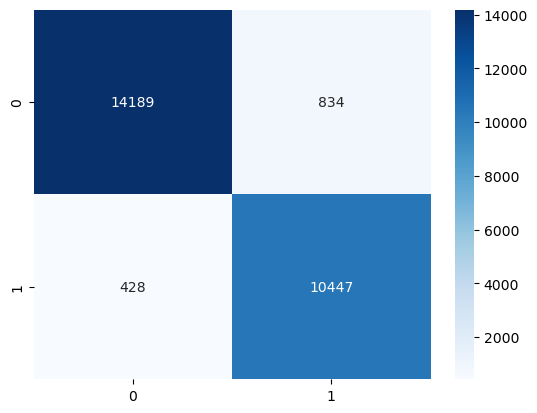

In [72]:
sns.heatmap(tab, annot=True,fmt="2g", cmap="Blues")

In [73]:
accuracy = accuracy_score(Y_pred, Y_test)
print(f"Accuracy : {round(accuracy,2)*100}%")

Accuracy : 95.0%


In [74]:
precision = precision_score(Y_pred, Y_test)
print(f"Precision : {round(accuracy,2)*100}%")

Precision : 95.0%


In [75]:
recall = recall_score(Y_pred, Y_test)
print(f"recall : {round(recall,2)*100}%")

recall : 96.0%


In [76]:
f1 = f1_score(Y_pred, Y_test)
print(f"f1 : {round(f1,2)*100}%")

f1 : 94.0%


In [77]:
import pickle

pickle.dump(gb, open(r"C:\Users\RupesH\Desktop\AIRLINEPASSENGER\model.pkl",'wb'))